In [1]:
!pip install numpy matplotlib pandas 

DEPRECATION: celery 5.0.5 has a non-standard dependency specifier pytz>dev. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of celery or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


# Data Acquisition

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

df = pd.read_csv('dataset/loan_data_2007_2014.csv')
df

/var/folders/yk/fkw6323n01l4qfb_x2dbrdz40000gn/T/ipykernel_94788/3774226163.py:5: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('dataset/loan_data_2007_2014.csv')


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,...,NaN,NaN,NaN,NaN,NaN,NaN,29900.0,NaN,NaN,NaN
466281,466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,...,NaN,NaN,NaN,NaN,NaN,NaN,39400.0,NaN,NaN,NaN
466282,466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,...,NaN,NaN,NaN,NaN,NaN,NaN,13100.0,NaN,NaN,NaN
466283,466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,...,NaN,NaN,NaN,NaN,NaN,NaN,53100.0,NaN,NaN,NaN


In [21]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'acc_now_delinq', 'tot_

In [22]:
df['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

# Data Understanding

In [25]:
df.drop(['Unnamed: 0', 'id', 'member_id'], axis=1, inplace=True)

In [ ]:
df.shape

(466285, 75)

In [ ]:
df.isnull().sum()

Unnamed: 0               0
id                       0
member_id                0
loan_amnt                0
funded_amnt              0
                     ...  
all_util            466285
total_rev_hi_lim     70276
inq_fi              466285
total_cu_tl         466285
inq_last_12m        466285
Length: 75, dtype: int64

In [32]:
df.skew()

/var/folders/yk/fkw6323n01l4qfb_x2dbrdz40000gn/T/ipykernel_94788/1665899112.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


loan_amnt                        0.730980
funded_amnt                      0.734845
funded_amnt_inv                  0.730250
int_rate                         0.334938
installment                      0.949293
annual_inc                      29.568905
dti                              0.188283
delinq_2yrs                      5.345748
inq_last_6mths                   2.142143
mths_since_last_delinq           0.464523
mths_since_last_record          -0.448440
open_acc                         1.165698
pub_rec                         14.941355
revol_bal                       19.476291
revol_util                      -0.160962
total_acc                        0.813061
out_prncp                        1.590189
out_prncp_inv                    1.590503
total_pymnt                      1.406403
total_pymnt_inv                  1.404658
total_rec_prncp                  1.445591
total_rec_int                    2.268276
total_rec_late_fee              13.843497
recoveries                      13

In [33]:
df.kurtosis()

/var/folders/yk/fkw6323n01l4qfb_x2dbrdz40000gn/T/ipykernel_94788/615572439.py:1: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.kurtosis()


loan_amnt                          -0.134878
funded_amnt                        -0.124120
funded_amnt_inv                    -0.123861
int_rate                           -0.262517
installment                         0.767986
annual_inc                       3071.114370
dti                                -0.540701
delinq_2yrs                        53.143918
inq_last_6mths                     13.863883
mths_since_last_delinq             -0.732304
mths_since_last_record             -0.645211
open_acc                            2.817052
pub_rec                          1116.390912
revol_bal                        1433.063059
revol_util                          2.691899
total_acc                           0.934098
out_prncp                           1.957280
out_prncp_inv                       1.958573
total_pymnt                         2.200556
total_pymnt_inv                     2.198647
total_rec_prncp                     2.041533
total_rec_int                       7.158622
total_rec_

In [26]:
df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,466256.000000,466256.000000,215934.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,0.284678,0.804745,34.104430,...,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,0.797365,1.091598,21.778487,...,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,0.000000,0.000000,16.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,0.000000,0.000000,31.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,0.000000,1.000000,49.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,3.790000e+04,NaN,NaN,NaN
max,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,29.000000,33.000000,188.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,9.999999e+06,NaN,NaN,NaN


In [27]:
for i in df.columns:
    print(f"{i} : {df[i].dtype}")

loan_amnt : int64
funded_amnt : int64
funded_amnt_inv : float64
term : object
int_rate : float64
installment : float64
grade : object
sub_grade : object
emp_title : object
emp_length : object
home_ownership : object
annual_inc : float64
verification_status : object
issue_d : object
loan_status : object
pymnt_plan : object
url : object
desc : object
purpose : object
title : object
zip_code : object
addr_state : object
dti : float64
delinq_2yrs : float64
earliest_cr_line : object
inq_last_6mths : float64
mths_since_last_delinq : float64
mths_since_last_record : float64
open_acc : float64
pub_rec : float64
revol_bal : int64
revol_util : float64
total_acc : float64
initial_list_status : object
out_prncp : float64
out_prncp_inv : float64
total_pymnt : float64
total_pymnt_inv : float64
total_rec_prncp : float64
total_rec_int : float64
total_rec_late_fee : float64
recoveries : float64
collection_recovery_fee : float64
last_pymnt_d : object
last_pymnt_amnt : float64
next_pymnt_d : object
last_

In [28]:
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(include='object').columns

In [31]:
for i in cat_cols:
    print(f"{i} : {df[i].nunique()}")

term : 2
grade : 7
sub_grade : 35
emp_title : 205475
emp_length : 11
home_ownership : 6
verification_status : 3
issue_d : 91
loan_status : 9
pymnt_plan : 2
url : 466285
desc : 124436
purpose : 14
title : 63099
zip_code : 888
addr_state : 50
earliest_cr_line : 664
initial_list_status : 2
last_pymnt_d : 98
next_pymnt_d : 100
last_credit_pull_d : 103
application_type : 1


# Exploratory Data Analysis

### Bar Chart Variabel Target

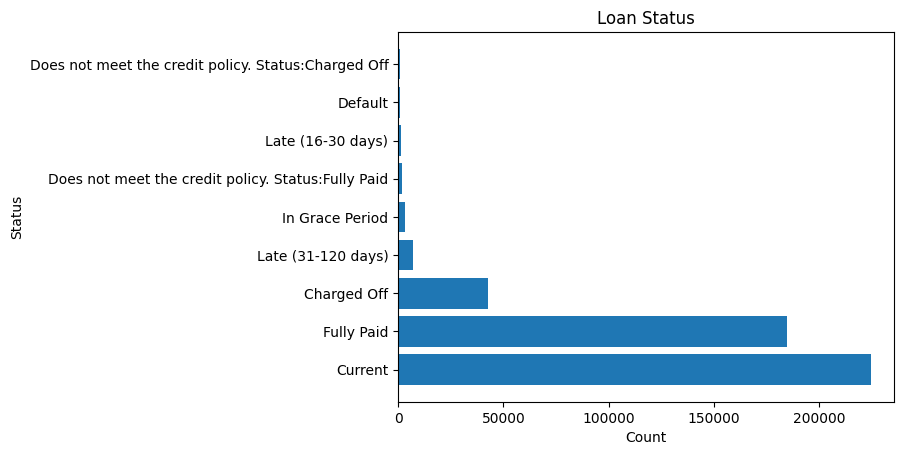

In [36]:
import matplotlib.pyplot as plt

plt.barh(df['loan_status'].value_counts().index, df['loan_status'].value_counts().values)
plt.title('Loan Status')
plt.xlabel('Count')
plt.ylabel('Status')
plt.show()

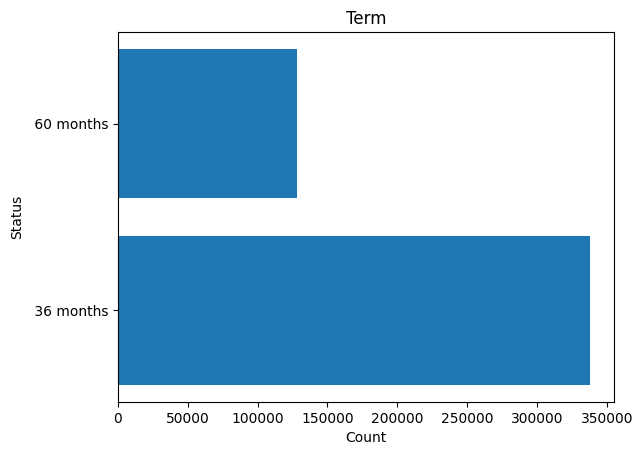

In [37]:
import matplotlib.pyplot as plt

plt.barh(df['term'].value_counts().index, df['term'].value_counts().values)
plt.title('Term')
plt.xlabel('Count')
plt.ylabel('Status')
plt.show()

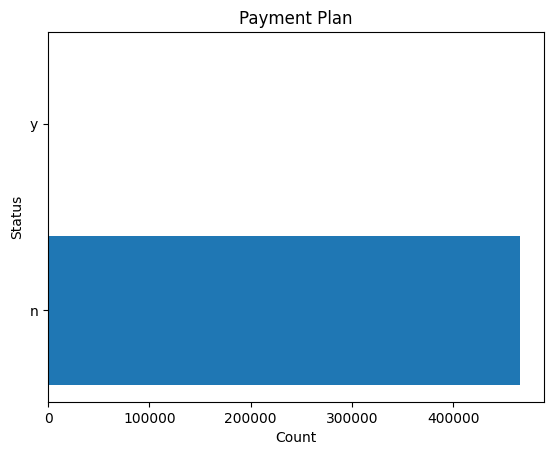

In [38]:
import matplotlib.pyplot as plt

plt.barh(df['pymnt_plan'].value_counts().index, df['pymnt_plan'].value_counts().values)
plt.title('Payment Plan')
plt.xlabel('Count')
plt.ylabel('Status')
plt.show()

### Density Plot Variabel dengan Skew Tinggi

In [40]:
high_corr = []

for i in num_cols:
    if df[i].skew() > 1 or df[i].skew() < -1:
        high_corr.append(i)
        
high_corr

['annual_inc',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'collections_12_mths_ex_med',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim']

/var/folders/yk/fkw6323n01l4qfb_x2dbrdz40000gn/T/ipykernel_94788/978580863.py:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=var_name, shade=True, ax=ax)
/var/folders/yk/fkw6323n01l4qfb_x2dbrdz40000gn/T/ipykernel_94788/978580863.py:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=var_name, shade=True, ax=ax)
/var/folders/yk/fkw6323n01l4qfb_x2dbrdz40000gn/T/ipykernel_94788/978580863.py:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=var_name, shade=True, ax=ax)
/var/folders/yk/fkw6323n01l4qfb_x2dbrdz40000gn/T/ipykernel_94788/978580863.py:19: FutureWarning: 

`shade` is now deprecated

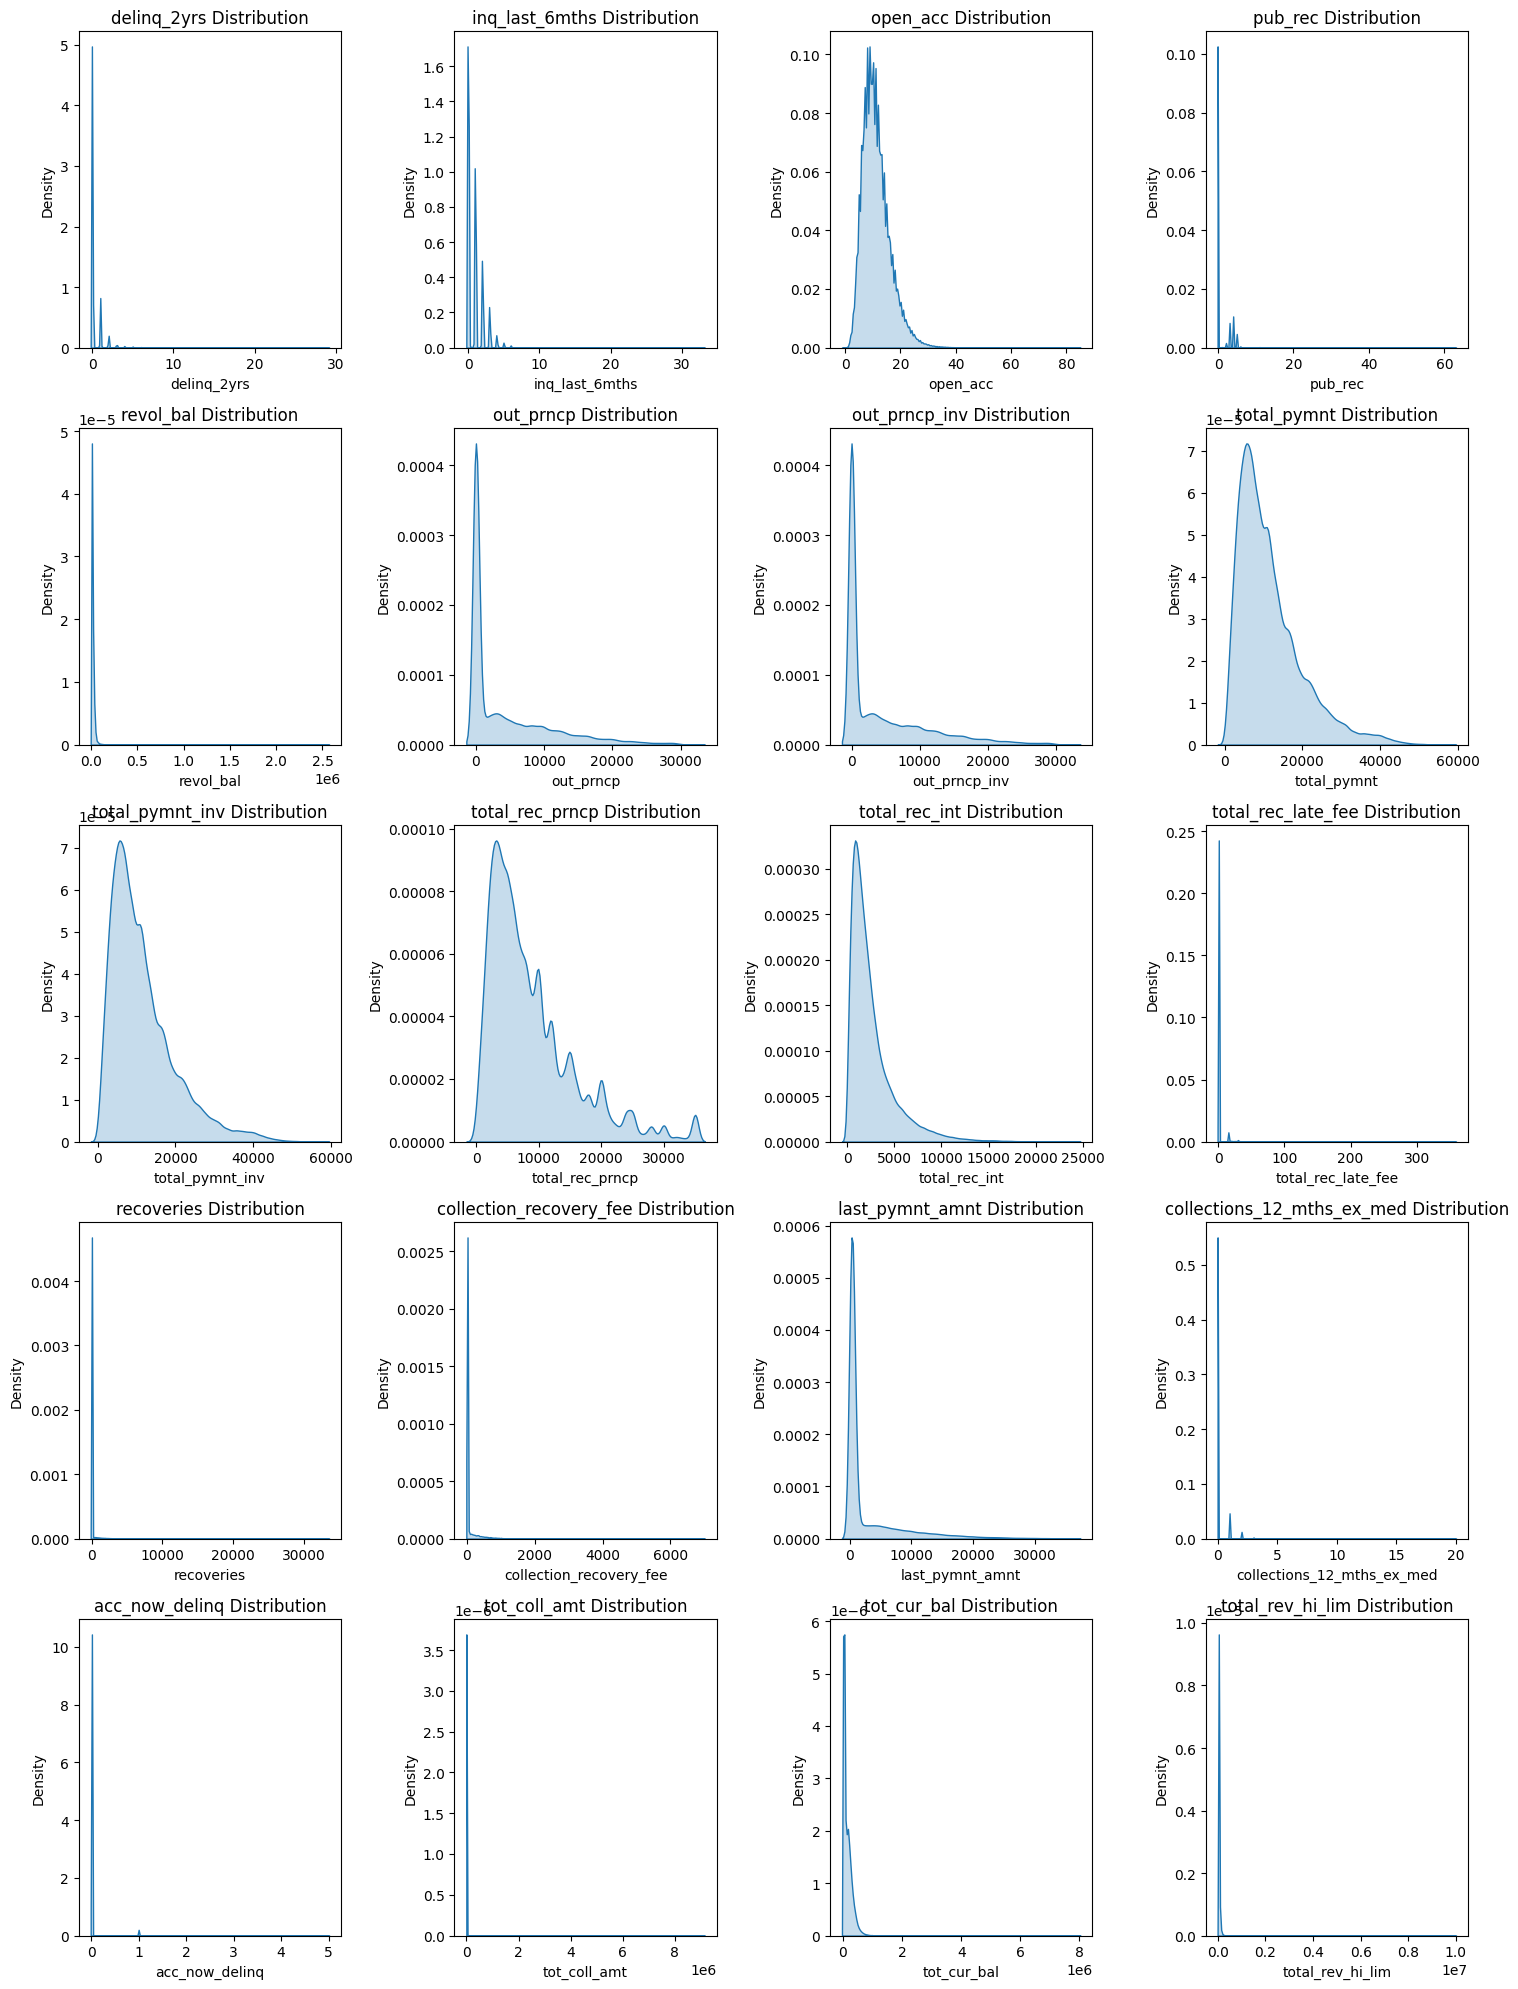

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with enough rows and columns to accommodate all variables
rows = 5  # Integer division for rows
cols = min(4, len(df.columns))  # Maximum of 4 columns per row

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))  # Adjust figsize as needed

# Flatten the 2D axes array for easier iteration
axes_flat = axes.flatten()

# Enumerate through variable names and corresponding axes
for i, var_name in enumerate(high_corr[1:]):  # Skip the first column (might be index)
    # Select the current axis
    ax = axes_flat[i]

    # Create the KDE plot for the variable
    sns.kdeplot(data=df, x=var_name, shade=True, ax=ax)

    # Set labels and title for the subplot
    ax.set_xlabel(var_name)
    ax.set_title(var_name + ' Distribution')

# Adjust layout (optional)
plt.tight_layout()

# Show the plot
plt.show()


### Correlation Map

/var/folders/yk/fkw6323n01l4qfb_x2dbrdz40000gn/T/ipykernel_94788/2287196817.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=False)


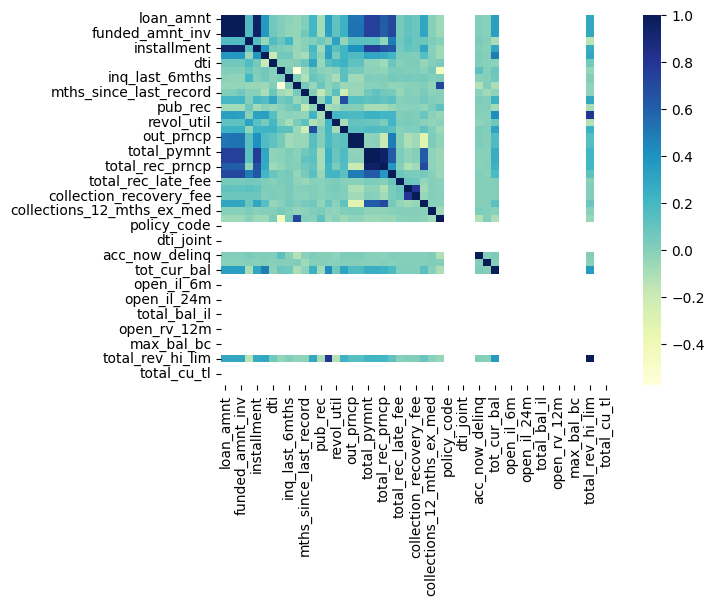

In [35]:
import seaborn as sns

dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=False) 
  
# displaying heatmap 
plt.show() 

### Scatter Plot Variabel dengan Korelasi Tinggi

/var/folders/yk/fkw6323n01l4qfb_x2dbrdz40000gn/T/ipykernel_94788/3086467563.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()  # Calculate correlation matrix


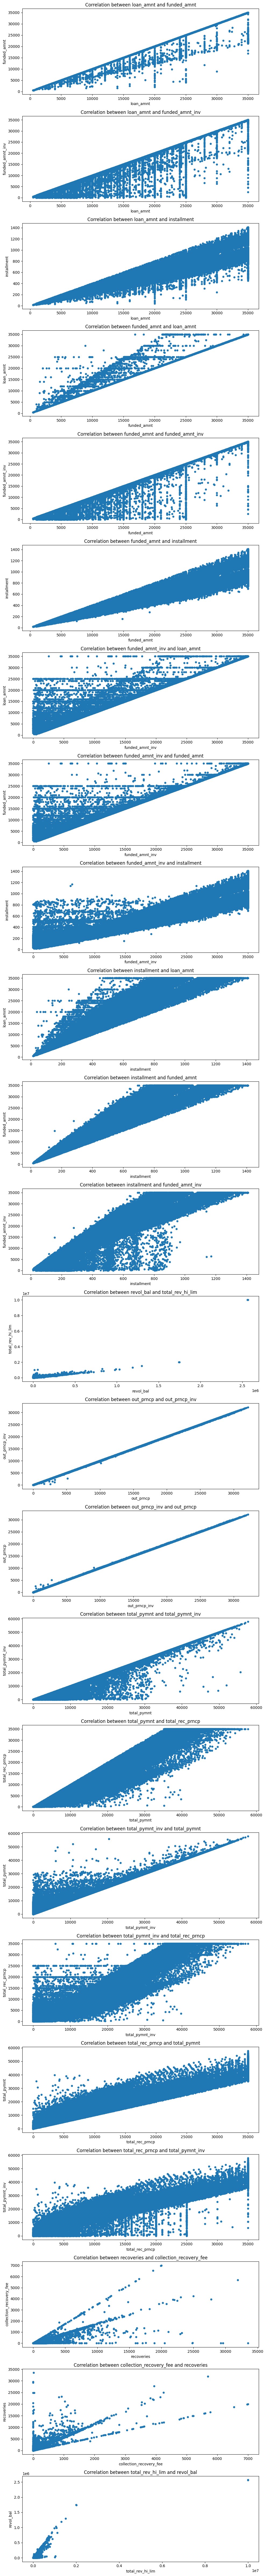

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is loaded into a pandas DataFrame named 'df'
correlation_matrix = df.corr()  # Calculate correlation matrix

# Filter variable pairs with correlation above 0.8 (excluding absolute values)
filtered_pairs = []
for col1, row in correlation_matrix.iterrows():
    for col2 in row.index:
        if col1 != col2 and abs(row[col2]) > 0.8:
            filtered_pairs.append((col1, col2))

# Create the scatter plots
fig, axes = plt.subplots(len(filtered_pairs), 1, figsize=(10, len(filtered_pairs) * 4))  # Adjust figsize as needed

# Iterate through filtered pairs and create scatter plots
for i, pair in enumerate(filtered_pairs):
    ax = axes[i]
    df.plot.scatter(x=pair[0], y=pair[1], ax=ax)  # Scatter plot for each pair
    ax.set_xlabel(pair[0])
    ax.set_ylabel(pair[1])
    ax.set_title(f"Correlation between {pair[0]} and {pair[1]}")

# Adjust layout (optional)
plt.tight_layout()

# Show the plot
plt.show()


# Data Preparation

### Handling Missing Value

In [46]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'acc_now_delinq', 'tot_

In [47]:
for i in df.columns:
    if df[i].isnull().sum() < 1000:
        df[i].ffill(inplace=True)
    else:
        df.drop(i, axis=1, inplace=True)

### Feature Engineering

In [71]:
cat_cols 

Index(['sub_grade', 'issue_d', 'purpose', 'title', 'zip_code', 'addr_state',
       'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d'],
      dtype='object')

In [56]:
for i in cat_cols:
    print(df[i].value_counts())

 36 months    337953
 60 months    128332
Name: term, dtype: int64
B    136929
C    125293
D     76888
A     74867
E     35757
F     13229
G      3322
Name: grade, dtype: int64
B3    31686
B4    30505
C1    26953
C2    26740
B2    26610
C3    25317
B5    25252
C4    24105
B1    22876
C5    22178
A5    21757
D1    19261
A4    19045
D2    17046
D3    14916
D4    14099
A3    12568
D5    11566
A2    10956
A1    10541
E1     9033
E2     8669
E3     6976
E4     5992
E5     5087
F1     3940
F2     3001
F3     2708
F4     2067
F5     1513
G1     1109
G2      823
G3      583
G4      422
G5      385
Name: sub_grade, dtype: int64
MORTGAGE    235875
RENT        188473
OWN          41704
OTHER          182
NONE            50
ANY              1
Name: home_ownership, dtype: int64
Verified           168055
Source Verified    149993
Not Verified       148237
Name: verification_status, dtype: int64
Oct-14    38782
Jul-14    29306
Nov-14    25054
May-14    19099
Apr-14    19071
          ...  
Aug-07    

In [58]:
df.drop(['url', 'pymnt_plan', 'application_type'], axis = 1, inplace = True)

In [59]:
bad_status = [
    'Charged Off' 
    , 'Default' 
    , 'Does not meet the credit policy. Status:Charged Off'
    , 'Late (31-120 days)'
]

df['red_flag'] = np.where(df['loan_status'].isin(bad_status), 1, 0)

In [61]:
df.drop('loan_status', axis=1, inplace=True)

### Encoding Variabel Kategorik

In [72]:
cat_cols 

Index(['sub_grade', 'issue_d', 'purpose', 'title', 'zip_code', 'addr_state',
       'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d'],
      dtype='object')

In [74]:
from sklearn.preprocessing import RobustScaler 

low_cardinality, high_cardinality = [], []

for i in cat_cols:
    if df[i].nunique() < 10:
        low_cardinality.append(i)
    else:
        high_cardinality.append(i)

In [80]:
from sklearn.preprocessing import LabelEncoder

for i in low_cardinality:
    df = pd.get_dummies(df, columns=[i], drop_first=True)
else:
    encoder = LabelEncoder()
    df[i] = encoder.fit_transform(df[i])


### Handling Skew

In [82]:
from sklearn.preprocessing import RobustScaler 

X = df.drop('red_flag', axis=1)
y = df['red_flag']

scaler = RobustScaler()
X = scaler.fit_transform(X)

In [88]:
df['red_flag'].value_counts()

0    415317
1     50968
Name: red_flag, dtype: int64

# Data Modelling

### Train-Test Split

In [83]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Performance Metrics

In [84]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def get_performance_metrics(y_pred, y_test):
  result = pd.DataFrame()
  result['accuracy'] = [accuracy_score(y_test, y_pred)]
  result['precision'] = [precision_score(y_test, y_pred, average = 'weighted')]
  result['recall'] = [recall_score(y_test, y_pred, average = 'weighted')]
  result['f1-score'] = [f1_score(y_test, y_pred, average = 'weighted')]
  return result

### Linear Regression

In [86]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred = np.where(y_pred < 0.5, 0, 1)

linear = get_performance_metrics(y_pred, y_test)
linear

,accuracy,precision,recall,f1-score
0,0.948765,0.95115,0.948765,0.941783


### Logistic Regression

In [87]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred = np.where(y_pred < 0.5, 0, 1)

logistic = get_performance_metrics(y_pred, y_test)
logistic 

/Users/whs9801/miniforge3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,accuracy,precision,recall,f1-score
0,0.988097,0.98806,0.988097,0.987879


### CatBoost

In [92]:
!pip install catboost

DEPRECATION: celery 5.0.5 has a non-standard dependency specifier pytz>dev. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of celery or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [93]:
from catboost import CatBoostClassifier

model = CatBoostClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred = np.where(y_pred < 0.5, 0, 1)

catboost = get_performance_metrics(y_pred, y_test)
catboost 

Learning rate set to 0.129142
0:	learn: 0.4457991	total: 110ms	remaining: 1m 50s
1:	learn: 0.2978804	total: 186ms	remaining: 1m 32s
2:	learn: 0.2149974	total: 292ms	remaining: 1m 36s
3:	learn: 0.1630972	total: 400ms	remaining: 1m 39s
4:	learn: 0.1253412	total: 476ms	remaining: 1m 34s
5:	learn: 0.1092461	total: 544ms	remaining: 1m 30s
6:	learn: 0.0921310	total: 627ms	remaining: 1m 28s
7:	learn: 0.0808373	total: 692ms	remaining: 1m 25s
8:	learn: 0.0727330	total: 739ms	remaining: 1m 21s
9:	learn: 0.0652269	total: 786ms	remaining: 1m 17s
10:	learn: 0.0570325	total: 831ms	remaining: 1m 14s
11:	learn: 0.0535072	total: 880ms	remaining: 1m 12s
12:	learn: 0.0497148	total: 926ms	remaining: 1m 10s
13:	learn: 0.0477620	total: 971ms	remaining: 1m 8s
14:	learn: 0.0444100	total: 1.02s	remaining: 1m 6s
15:	learn: 0.0419493	total: 1.07s	remaining: 1m 5s
16:	learn: 0.0401830	total: 1.12s	remaining: 1m 4s
17:	learn: 0.0385795	total: 1.17s	remaining: 1m 3s
18:	learn: 0.0374149	total: 1.23s	remaining: 1m 3

,accuracy,precision,recall,f1-score
0,0.996075,0.996086,0.996075,0.996046


In [98]:
!pip install lightgbm

  Using cached lightgbm-4.3.0.tar.gz (1.7 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
anceled


# Evaluation

In [96]:
result = pd.concat([linear, logistic, catboost], axis=0)
result

,accuracy,precision,recall,f1-score
0,0.948765,0.951150,0.948765,0.941783
0,0.988097,0.988060,0.988097,0.987879
0,0.996075,0.996086,0.996075,0.996046


In [97]:
model = ['Linear Regression', 'Logistic Regression', 'CatBoost Classifier']

result['model'] = model
result.reset_index(drop=True, inplace=True)
result

,accuracy,precision,recall,f1-score,model
0,0.948765,0.951150,0.948765,0.941783,Linear Regression
1,0.988097,0.988060,0.988097,0.987879,Logistic Regression
2,0.996075,0.996086,0.996075,0.996046,CatBoost Classifier
